In [33]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
def z_scores(df,window = 400):
    rstd = df.rolling(window=window,min_periods=window).std()
    rmean = df.rolling(window=window,min_periods=window).mean()
    z = (df - rmean) / rstd
    z = z.dropna()
    return z
def log_returns(df):
    df = np.log(df)
    df = df - df.shift(1)
    #df.index.name = None
    return df


In [3]:
x_cols=['VXO', 'HULBERTSENTIMENT','LAST_DPS_GROSS'
,'NOS',
'BFCIUS',
'NOS_exDef_exAir',
'CBOE_leadIC',
'ppiflag',
'fdtrflag',
'urflag',
'TRAIL_12M_EPS_BEF_XO_ITEM.vintage',
'loan_corrected',
'IRX',
'bbyield',
'otime',
'ctime',
'htime',
'ltime',
'TYVIX',
'hulbert.pred',
'del.corona',
'ETF_SPECULATION.INDICATOR',
'FOMC_2Day',
'TOM' , 'SIM' , 'FOMC',
'PCT_MEMBERS_WITH_NEW_52W_HIGHS' , 'PCT_MEMBERS_WITH_NEW_52_WK_LOWS',
'htaassi' , 'TOM48'  ,'com_tom',
'stockIndexSentiment',  'stockIndexFear' , 'stockIndexUncertainty',
'stockIndexPriceDirection' , 'princomp_SentDir' ,  'IND_PROD' , 'SOTU' ,'vs3',
'vix_cor',
'wil5kGDPnow',
'w5kgdp', 'spxhigh', 'spxlow','spxopen', 'spxclose']

In [4]:
## Old Dataset pulled in 2018 from yf

hull_df = pd.read_csv('df_w_112023.csv')
hull_df.Date = pd.DatetimeIndex(hull_df['Date'])
hull_df.set_index(hull_df.Date,inplace=True)
hull_df = hull_df.drop('Date',axis=1)
X_levels = hull_df.drop(x_cols,axis=1)
X_levels.dropna()


,US3M,US10YR,TRAIL_12M_EPS_BEF_XO_ITEM,PE_RATIO,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,SPGSCI,BDIY,...,SPVXMP,SPVXSP,VXD,VXN,RVX,VIX3M,VIX6M,VIX9D,VIX1Y,ETS
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-26,-0.0051,2.1899,84.530000,13.921685,1158.85,1181.23,1135.91,1176.80,657.8400,1541,...,132740.90,14987.4861,32.03,34.49,43.10,34.41,33.25,36.34,33.36,1.004532
2011-08-29,0.0000,2.2561,84.530000,14.315391,1177.91,1210.28,1177.91,1210.08,662.9400,1541,...,128914.90,14079.1536,29.25,32.11,39.38,31.98,31.76,33.39,32.18,1.005354
2011-08-30,0.0051,2.1767,84.530000,14.348989,1209.76,1220.10,1195.77,1212.92,672.5200,1537,...,132321.10,14466.2094,29.54,32.02,40.84,32.47,32.16,34.67,32.21,1.010304
2011-08-31,0.0102,2.2234,84.730000,14.385578,1213.00,1230.71,1209.35,1218.89,674.6900,1619,...,129419.10,14173.2710,28.82,31.37,39.39,31.67,31.59,32.33,31.70,1.011272
2011-09-01,0.0102,2.1302,84.690000,14.221514,1219.12,1229.29,1203.85,1204.42,670.3800,1682,...,130440.40,14401.9798,28.60,31.36,39.61,31.99,31.88,31.78,32.20,1.010440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-14,5.3788,4.4473,189.856300,23.679339,4458.97,4508.67,4458.97,4495.70,567.5568,1662,...,7966.21,1.7106,10.75,17.89,21.75,16.29,18.51,12.87,20.82,1.007110
2023-11-15,5.4067,4.5314,189.848600,23.717521,4505.30,4521.17,4495.31,4502.88,563.5154,1688,...,7865.02,1.6680,10.90,18.09,21.56,16.28,18.58,11.89,20.96,1.004199
2023-11-16,5.3928,4.4355,189.685400,23.746604,4497.08,4511.99,4487.83,4508.24,547.6106,1758,...,7775.57,1.6458,11.55,17.83,21.12,16.14,18.46,11.81,20.83,1.003360


In [35]:
X_returns = log_returns(X_levels)
X_zscores = z_scores(X_returns,window=400)
scaler = MinMaxScaler(feature_range=(-3, 3)).set_output(transform="pandas")
X_trimmed = scaler.fit_transform(df)
X_trimmed.to_pickle('Hull_df.pkl')

/Users/conradgann/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/conradgann/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


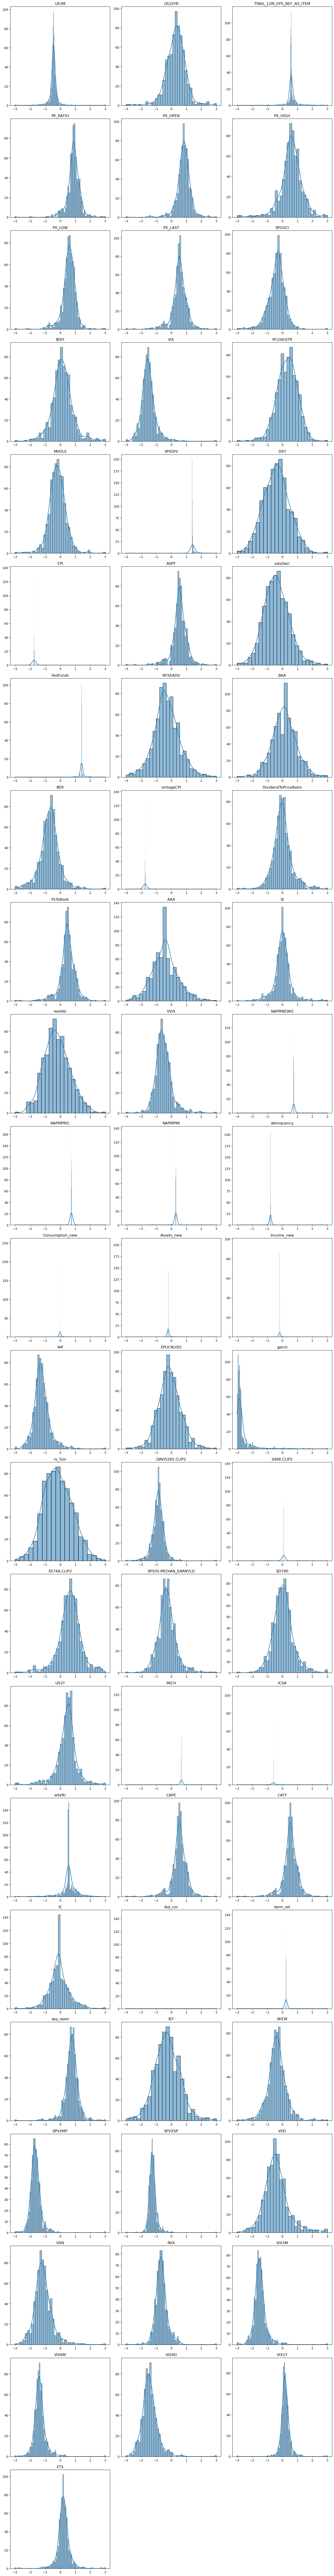

In [34]:
# Create a sample DataFrame with 71 columns
df = X_trimmed
# Convert infinity values to NaN in the DataFrame
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot histograms three across at a time
num_cols = 3
num_rows = (df.shape[1] + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

for i, col in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

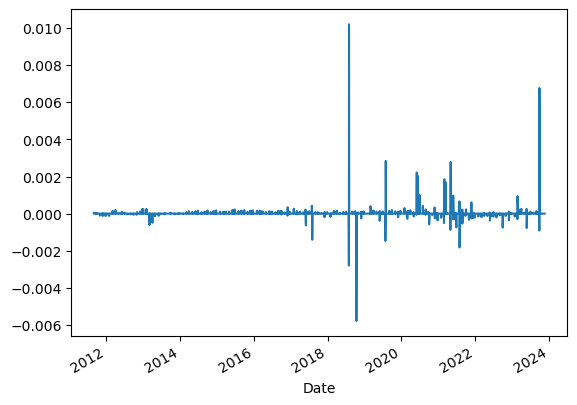

In [15]:
X_returns['Income_new'].sort_values().plot()

In [19]:
X_trimmed

MinMaxScaler(feature_range=(-3, 3))

In [20]:
df

,US3M,US10YR,TRAIL_12M_EPS_BEF_XO_ITEM,PE_RATIO,PX_OPEN,PX_HIGH,PX_LOW,PX_LAST,SPGSCI,BDIY,...,SPVXMP,SPVXSP,VXD,VXN,RVX,VIX3M,VIX6M,VIX9D,VIX1Y,ETS
Date,,,,,,,,,,,,,,,,,,,,,
2013-08-06,-0.015994,0.097617,0.954192,-1.086335,-0.269447,-0.425119,-0.973916,-0.833188,-0.759219,-0.495735,...,1.187862,0.741081,1.210224,0.731058,1.190493,1.226134,1.242170,1.010691,0.746643,-0.438476
2013-08-07,0.672504,-0.683081,-2.041431,0.099478,-0.906934,-1.059211,-0.816074,-0.582033,-0.825690,-0.995213,...,0.239879,0.410340,0.090523,0.143424,0.389721,0.445137,0.596667,0.131604,0.662690,-0.271243
2013-08-08,0.595149,-0.169555,-0.038630,0.396121,-0.244505,0.333989,0.192639,0.408181,-0.271503,-0.533653,...,-0.202247,-0.247761,0.020974,-0.217493,-0.252413,-0.196503,-0.420019,-0.332519,-0.424159,0.460290
2013-08-09,0.539953,-0.190223,-0.122096,-0.478948,0.120349,-0.177622,-0.303914,-0.550336,1.120915,-0.511155,...,0.762357,0.646041,0.773862,0.509870,0.430148,0.727407,0.591974,1.306934,0.540125,-0.412180
2013-08-12,-0.030926,0.611860,-0.038420,-0.212270,-0.692244,-0.829043,-0.328009,-0.238631,0.687779,-0.218662,...,0.059868,-0.188413,-0.481338,-1.013501,-0.974056,0.139671,0.291199,0.319268,0.020521,-0.324338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-20,-0.168079,-0.485812,-0.020459,-0.309824,-0.797732,-0.964316,-0.754183,-0.341682,-0.663392,0.105700,...,0.830549,0.105924,-0.156938,0.381203,0.509862,0.695995,0.707698,1.151122,0.658537,-0.810930
2023-06-21,-0.002973,-0.096026,-0.020314,-0.347832,-0.279039,-0.268727,-0.120670,-0.378850,0.946620,1.399119,...,-0.463042,-0.409569,-0.820474,-0.621917,-0.616250,-0.498259,-0.322198,-0.625921,-0.240196,-0.308675
2023-06-22,-0.137573,0.673948,-0.020343,0.275796,-0.435014,-0.064747,-0.144606,0.289113,-1.296689,1.690845,...,-0.315222,-0.474709,-0.583009,-0.454264,-0.269708,-0.406703,-0.387156,-0.664670,-0.239832,0.476201
